# Analysis of the dataset used for unsupervised learning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns

## Stats

In [2]:
df = pd.read_csv("insurance.csv")
df_stat = df.copy()

In [3]:
df['sex'].replace({"female":1, "male":0}, inplace=True)
df['smoker'].replace({"yes":1, "no":0}, inplace=True)
df['region'].replace({"northeast":0, "northwest":1,"southeast":2, "southwest":3}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


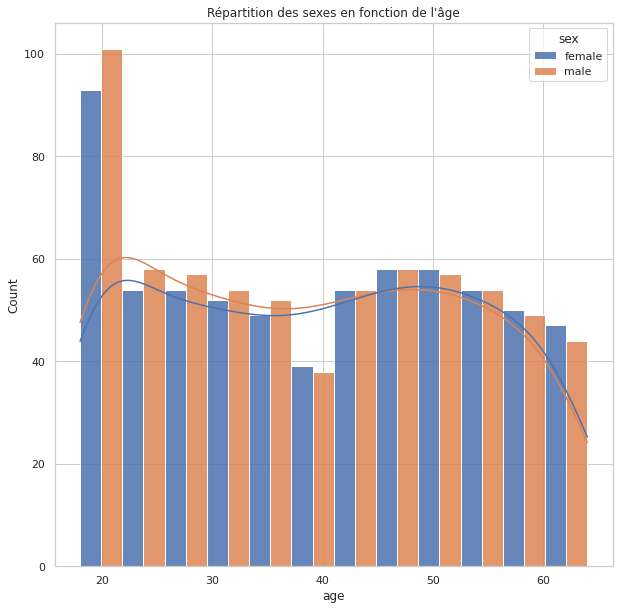

In [4]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,10))
plt.title("Répartition des sexes en fonction de l'âge")
sns.histplot(data=df_stat, x="age", kde=True,hue="sex", color=['r','b'], alpha=0.85,multiple="dodge")
plt.plot()

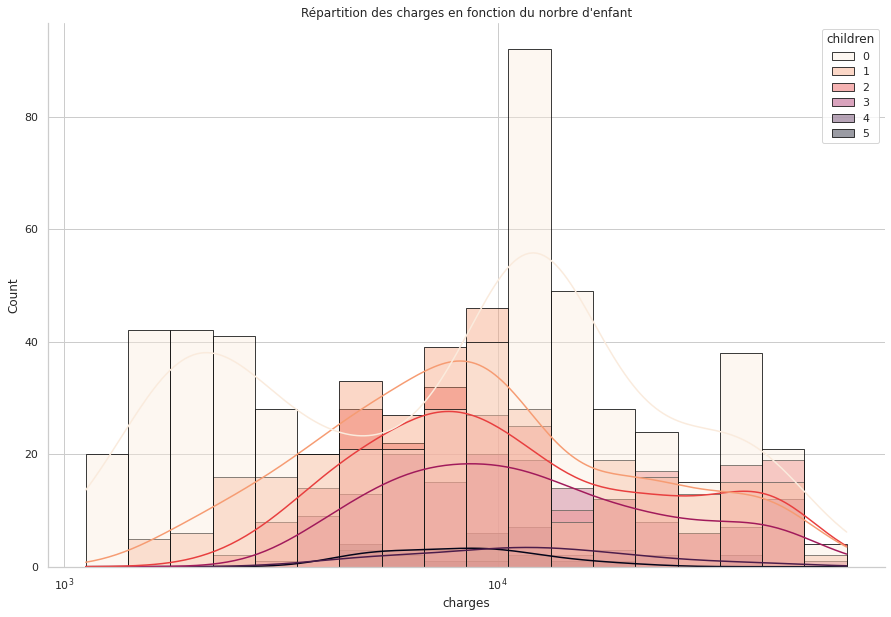

In [5]:
f, ax = plt.subplots(figsize=(15, 10))
plt.title("Répartition des charges en fonction du norbre d'enfant")
sns.despine(f)

sns.histplot(
    df_stat,
    x="charges", hue="children",
    kde=True,
    alpha = 0.4,
    palette=sns.color_palette("rocket_r", as_cmap=True),
    edgecolor="0.05",
    linewidth=.8,
    log_scale=True,
)
plt.show()

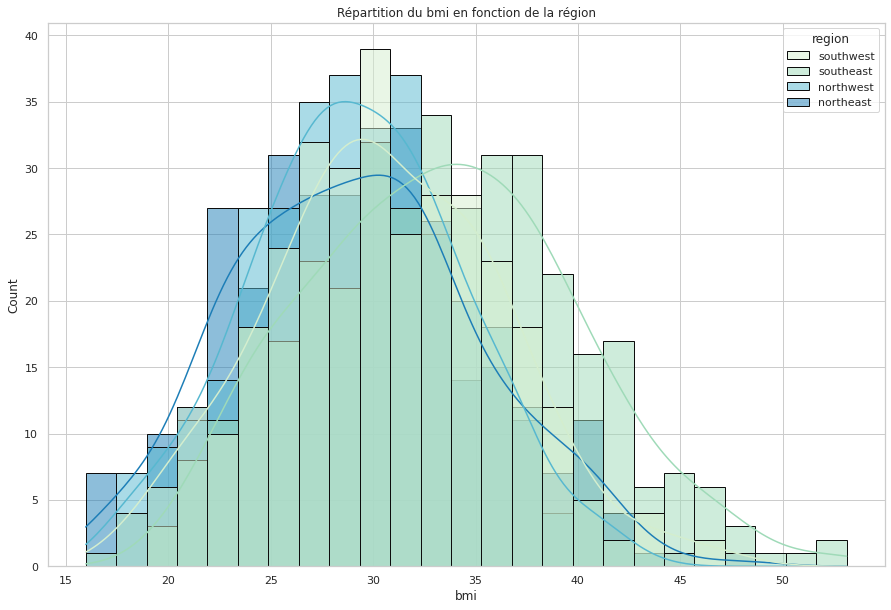

In [6]:
plt.figure(figsize=(15,10))
plt.title("Répartition du bmi en fonction de la région")
sns.histplot(data=df_stat, x="bmi", kde=True,hue="region",palette='GnBu',alpha=0.5,edgecolor="0.05",linewidth=1)
plt.show()

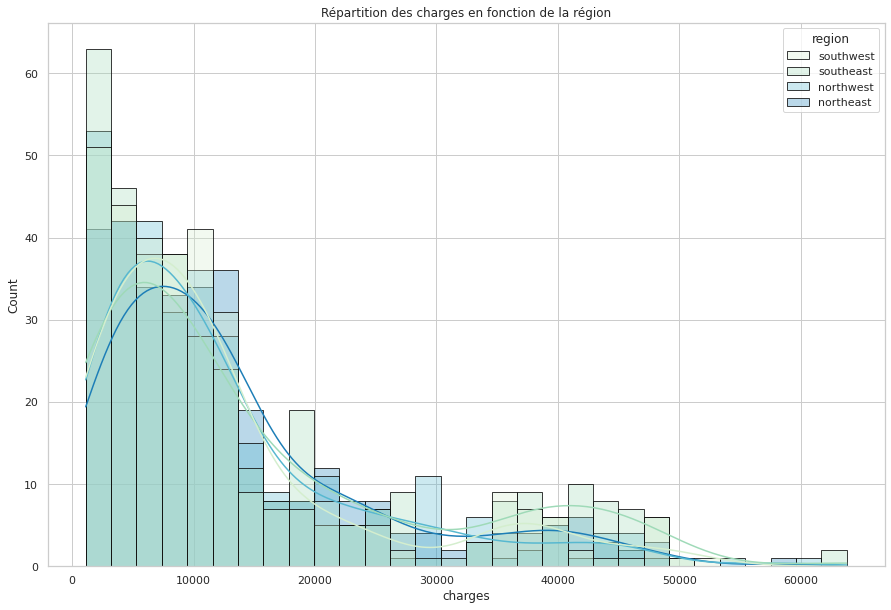

In [7]:
plt.figure(figsize=(15,10))
plt.title("Répartition des charges en fonction de la région")
sns.histplot(data=df_stat, x="charges", kde=True,hue="region",palette='GnBu',alpha=0.3,edgecolor="0.05",linewidth=.8)
plt.show()

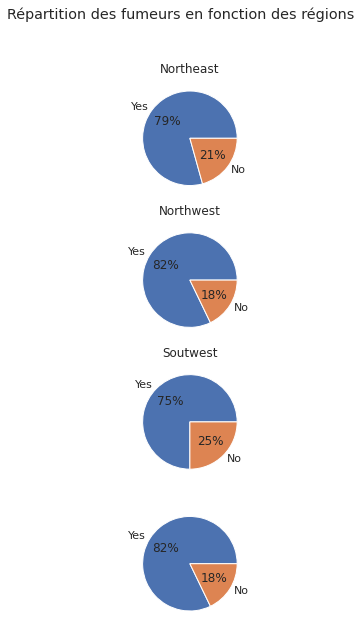

In [8]:

f, ax = plt.subplots(4,figsize=(10, 10))
f.suptitle('Répartition des fumeurs en fonction des régions')
labels=["Yes",'No']
ax[0].pie(df['smoker'][df["region"] == 0].value_counts(),labels=labels,autopct='%.0f%%')
ax[0].set_title('Northeast')
ax[1].pie(df['smoker'][df["region"] == 1].value_counts(),labels=labels,autopct='%.0f%%')
ax[1].set_title('Northwest')
ax[2].pie(df['smoker'][df["region"] == 2].value_counts(),labels=labels,autopct='%.0f%%')
ax[2].set_title('Southeast')
ax[3].pie(df['smoker'][df["region"] == 3].value_counts(),labels=labels,autopct='%.0f%%')
ax[2].set_title('Soutwest')
plt.show()

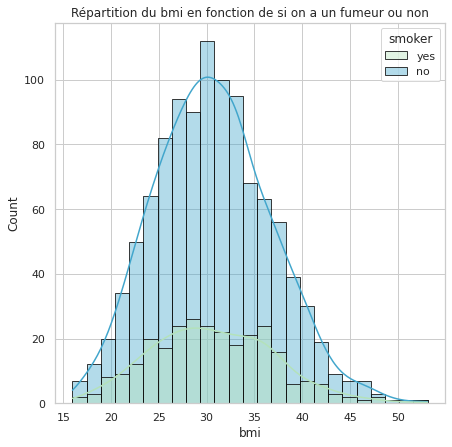

In [9]:
plt.figure(figsize=(7,7))
plt.title("Répartition du bmi en fonction de si on a un fumeur ou non")
sns.histplot(data=df_stat, x="bmi",hue="smoker",palette='GnBu',alpha=0.4,edgecolor="0.05",linewidth=.8,kde=True)
plt.show()

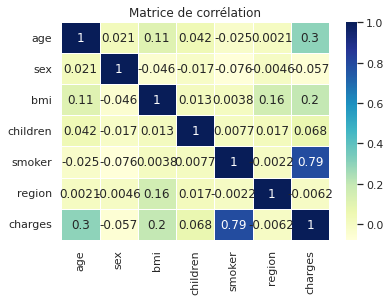

In [10]:
corr = df.corr()
plt.title("Matrice de corrélation")
sns.heatmap(corr,annot=True,linewidths=.5,cmap="YlGnBu")
plt.show()

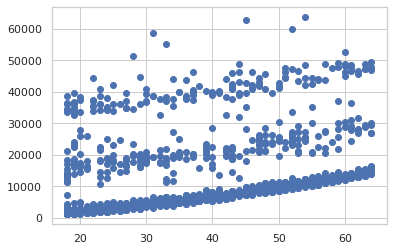

In [11]:
plt.scatter(df["age"], df["charges"])
plt.show()

## Unsupervised model

In [12]:
import sklearn.cluster as skc
from sklearn.decomposition import PCA

First we will try fitting a basic k-means with 3 clusters, using the age and charges columns of our dataframe

In [13]:
kmeans = skc.KMeans(n_clusters=3)
kmeans.fit(df[["age", "charges"]])

KMeans(n_clusters=3)

We predict with the same data, and assign colors to each cluster

In [14]:
Z = kmeans.predict(df[["age", "charges"]])
colors = ["orange", "blue", "green"]
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]

We now plot the clustering, with crosses representing the clusters' centroids.

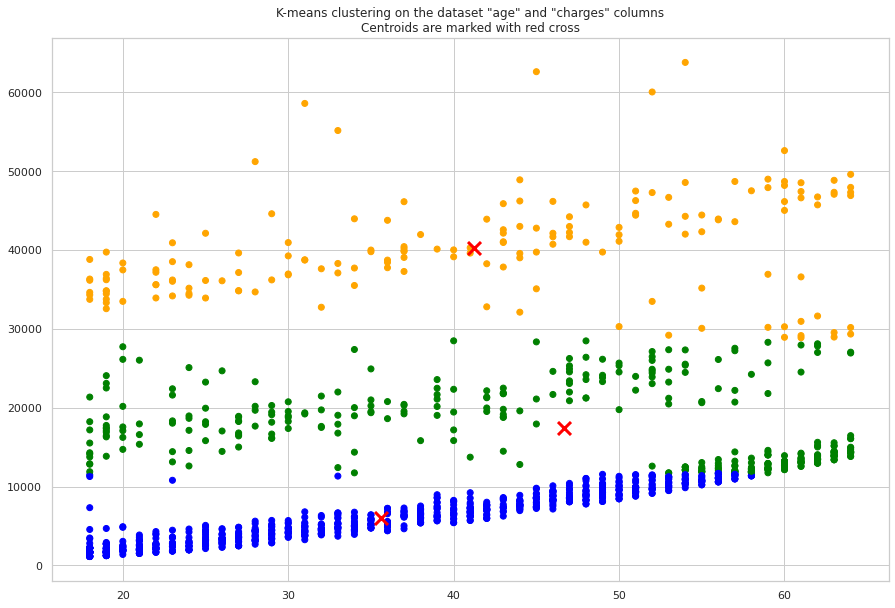

In [15]:

plt.figure(figsize=(15,10))
plt.scatter(df["age"], df["charges"], c=Z_c)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "K-means clustering on the dataset \"age\" and \"charges\" columns\n"
    "Centroids are marked with red cross"
)
plt.show()

Now we will try using the other categorical values, to do this we will factorise the columns

In [16]:
df['sex'].replace({"female":1, "male":0}, inplace=True)
df['smoker'].replace({"yes":1, "no":0}, inplace=True)
df['region'].replace({"northeast":0, "northwest":1,"southeast":2, "southwest":3}, inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


To train using all these columns, we will construct new training data by using a PCA and keeping the first 2 principal components

In [17]:
X = df[["age", "charges", "bmi", "sex", "children", "smoker", "region"]]
reduced_data = PCA(n_components=2).fit_transform(X)

We can train again using kmeans clustering with this new data

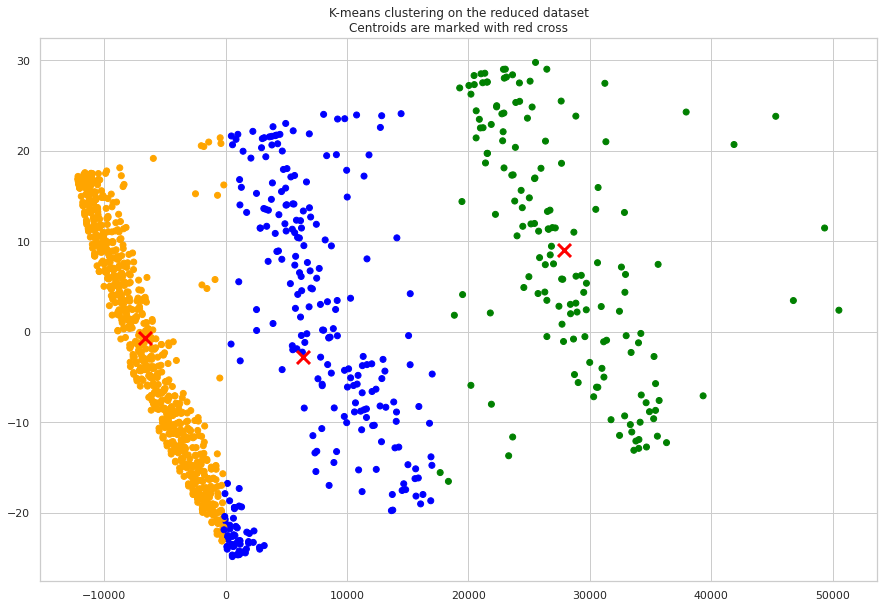

In [18]:

kmeans.fit(reduced_data)
Z = kmeans.predict(reduced_data)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]
plt.figure(figsize=(15,10))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=Z_c)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "K-means clustering on the reduced dataset\n"
    "Centroids are marked with red cross"
)
plt.show()

We will now train again using Minibatch kmeans clustering, and still 3 clusters. 

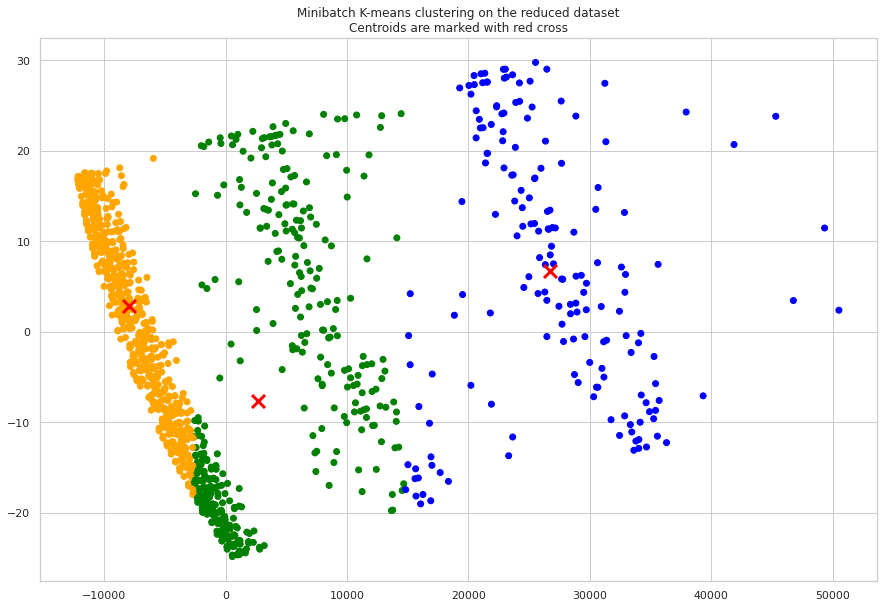

In [19]:
mkmeans = skc.MiniBatchKMeans(n_clusters=3)
Z = mkmeans.fit_predict(reduced_data)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]
plt.figure(figsize=(15,10))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=Z_c)
# Plot the centroids as a white X
centroids = mkmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "Minibatch K-means clustering on the reduced dataset\n"
    "Centroids are marked with red cross"
)
plt.show()

We will now train using Mean Shift clustering.

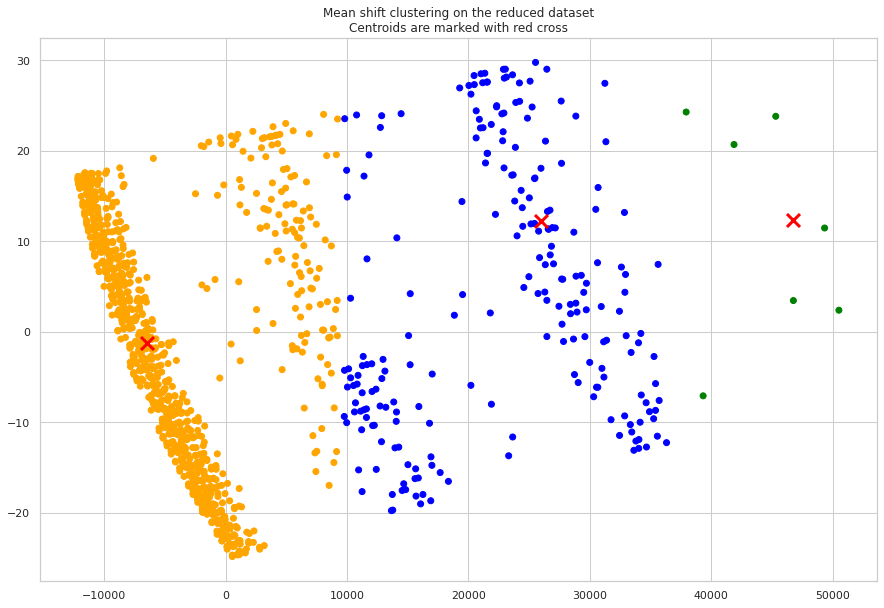

In [20]:
bandwith = skc.estimate_bandwidth(df, quantile=0.3)
ms = skc.MeanShift(bandwidth=bandwith,bin_seeding=True)
Z = ms.fit_predict(reduced_data)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]
plt.figure(figsize=(15,10))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=Z_c)
# Plot the centroids as a white X
centroids = ms.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "Mean shift clustering on the reduced dataset\n"
    "Centroids are marked with red cross"
)
plt.show()

We will now train using spectral clustering. This requires to rescale the data, to do so we use a standard scaler.

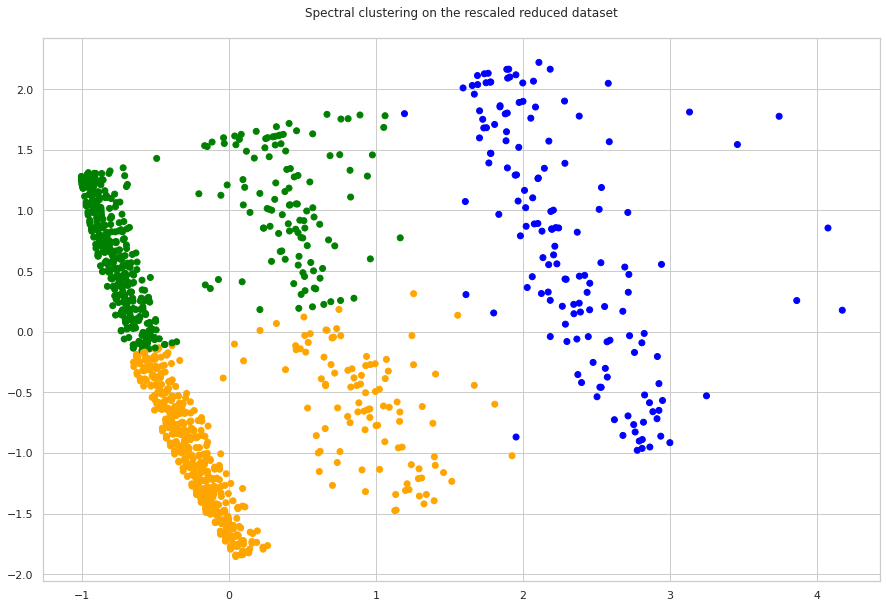

In [21]:
from sklearn import preprocessing
rdn = preprocessing.StandardScaler().fit_transform(reduced_data)

sc = skc.SpectralClustering(n_clusters=3)

Z = sc.fit_predict(rdn)
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]

plt.figure(figsize=(15,10))
plt.scatter(rdn[:,0], rdn[:,1], c=Z_c)

plt.title(
    "Spectral clustering on the rescaled reduced dataset\n"
)
plt.show()

Finally we will train using DBSCAN, with maximum distance *eps* of 0.25.

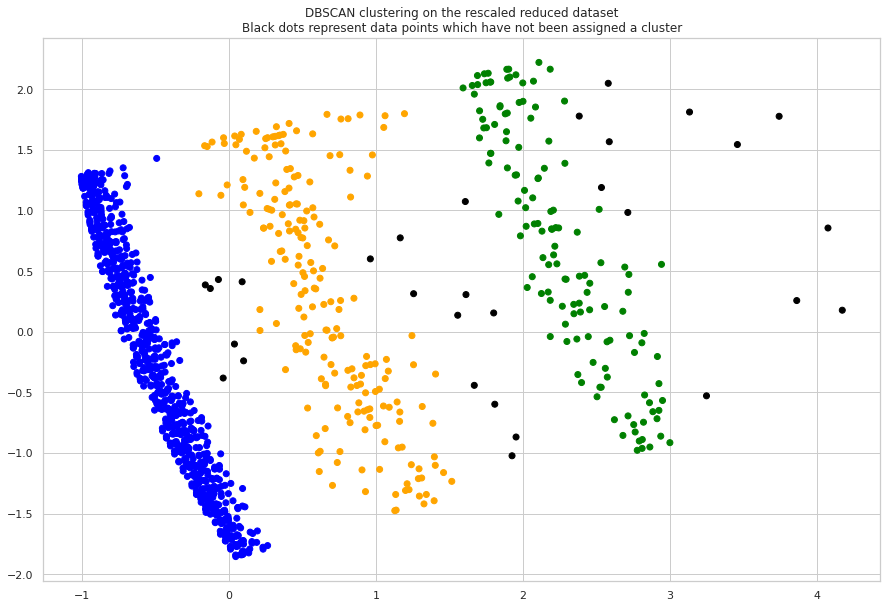

In [22]:
dbs = skc.DBSCAN(eps=0.25)

Z = dbs.fit_predict(rdn)
colors = ["orange", "blue", "green", "black"]
Z_c = [colors[Z[i]] for i in range(Z.shape[0])]

plt.figure(figsize=(15,10))
plt.scatter(rdn[:,0], rdn[:,1], c=Z_c)

plt.title(
    "DBSCAN clustering on the rescaled reduced dataset\n"
    "Black dots represent data points which have not been assigned a cluster"
)
plt.show()